In [1]:
import torch
import matplotlib.pyplot as plt
import EIANN.utils as ut
import EIANN.plot as pt
import EIANN._network as nt


from tqdm.autonotebook import tqdm
import numpy as np
import matplotlib.gridspec as gs
%load_ext autoreload
%autoreload 2

pt.update_plot_defaults()

C:\Yash Dev\EIANN\EIANN\utils\data_utils.py:7: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


### Vanilla BP MNIST

In [ ]:
train_dataloader, train_sub_dataloader, val_dataloader, test_dataloader, data_generator = ut.get_MNIST_dataloaders(sub_dataloader_size=20_000)

In [2]:
# Build network
network_name = "EIANN_1_hidden_mnist_vanBP"
config_path = f"../network_config/MNIST_templates/{network_name}.yaml"
saved_network_path = f"saved_networks/{network_name}.pkl"
bp = ut.build_EIANN_from_config(config_path, network_seed=66049)

# Train network
data_seed = 257
data_generator.manual_seed(data_seed)
bp.train(train_sub_dataloader, 
                test_dataloader, 
                epochs=1,
                val_interval=(0,-1,500),
                store_history=True, 
                store_params=True,
                status_bar=True)
ut.save_network(bp, path=saved_network_path)

bp_network = ut.load_network(saved_network_path)

Loading network from 'saved_networks/EIANN_1_hidden_mnist_vanBP.pkl'
Network successfully loaded from 'saved_networks/EIANN_1_hidden_mnist_vanBP.pkl'


In [ ]:
plt.plot(bp_network.val_loss_history)

In [ ]:
pt.plot_batch_accuracy(bp_network, test_dataloader, population='H1E')

### Vanilla BP Spiral

In [39]:
spiral_train_dataloader, spiral_val_dataloader, spiral_test_dataloader, spiral_data_generator = ut.get_spiral_dataloaders(N=2000)

# Build network
network_name = "EIANN_2_hidden_spiral_vanBP_fixed_bias"
config_path = f"../network_config/spiral/{network_name}.yaml"
saved_network_path = f"../saved_networks/{network_name}.pkl"
spiral_bp = ut.build_EIANN_from_config(config_path, network_seed=0)

# Train network
data_seed = 1
spiral_data_generator.manual_seed(data_seed)
spiral_bp.train(spiral_train_dataloader, 
                spiral_test_dataloader, 
                epochs=1,
                val_interval=(0,-1,500),
                store_history=True, 
                store_params=True,
                status_bar=True)
ut.save_network(spiral_bp, path=saved_network_path)
# spiral_bp_net = ut.load_network(saved_network_path)

Epochs: 100%|██████████| 1/1 [00:05<00:00,  5.03s/it]


Saved network to '../saved_networks/EIANN_2_hidden_spiral_vanBP_fixed_bias.pkl'


Batch accuracy = 93.83000183105469%


C:\Yash Dev\EIANN\EIANN\plot.py:747: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  avg_pop_activity = torch.tensor(avg_pop_activity)
C:\Yash Dev\EIANN\EIANN\plot.py:772: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


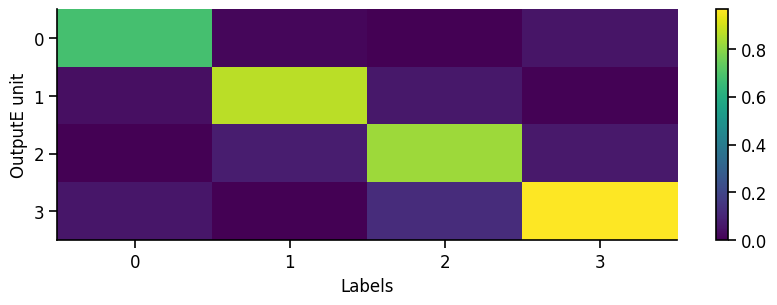

In [40]:
pt.plot_batch_accuracy(spiral_bp, spiral_test_dataloader)

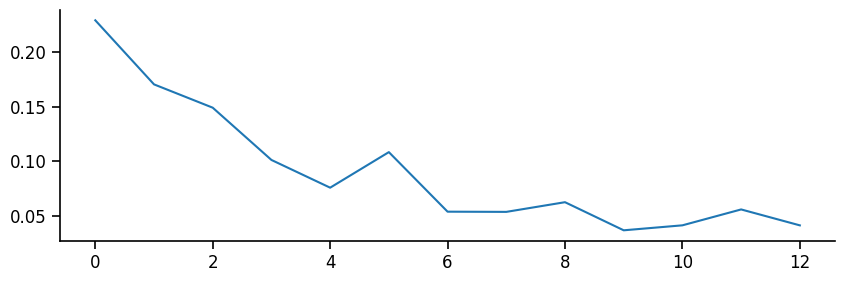

In [41]:
plt.plot(spiral_bp.val_loss_history)

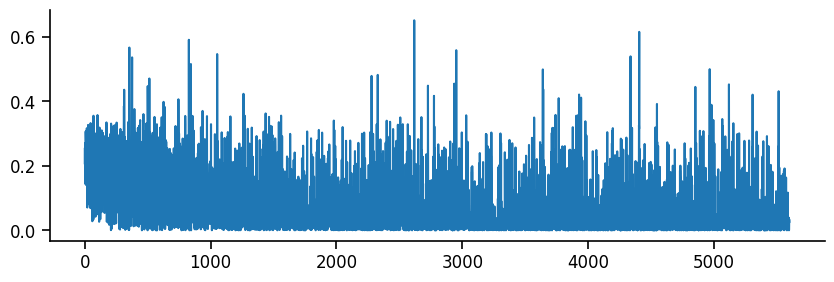

In [42]:
plt.plot(spiral_bp.loss_history)

In [9]:
index, data, label = next(iter(spiral_test_dataloader))

print(spiral_bp.forward(data))
print(label)

tensor([[0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0021, 0.0019],
        [0.0000, 0.0000, 0.0041, 0.0029],
        ...,
        [0.3216, 0.0000, 0.0000, 0.8097],
        [0.1564, 0.0000, 0.0000, 0.8113],
        [0.3885, 0.0000, 0.0000, 0.8086]], grad_fn=<ReluBackward0>)
tensor([[1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        ...,
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.]])


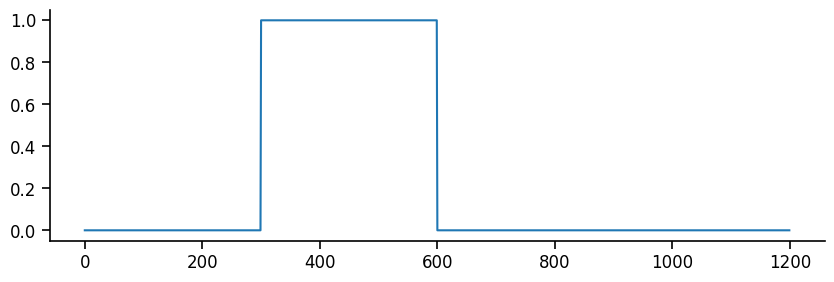

In [10]:
plt.plot(label[:,1])